### **SLP : Single Layer Perceptron**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# === Step Activation Function ===
def activation_function(x):
    return np.where(x >= 0, 1, 0)

# === Single Layer Perceptron ===
class SingleLayerPerceptron:
    def __init__(self, input_size, weight, bias, learning_rate, epochs):
        self.w = weight
        self.b = bias
        self.lr = learning_rate
        self.epochs = epochs
        self.errors_per_epoch = []
        self.accuracy_per_epoch = []

    def predict(self, x):
        output = np.dot(x, self.w) + self.b
        return activation_function(output)

    def fit(self, X, y):
        for epoch in range(1, self.epochs + 1):
            errors = 0
            for input, target in zip(X, y):
                prediction = self.predict(input)
                error = target - prediction
                if error != 0:
                    errors += 1
                self.w = self.w + self.lr * error * input
                self.b = self.b + self.lr * error
            acc = np.mean([self.predict(xi) == yi for xi, yi in zip(X, y)])
            self.errors_per_epoch.append(errors)
            self.accuracy_per_epoch.append(acc)
            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Accuracy = {acc:.2f}, Errors = {errors}")

# === Dataset ===
X = np.array([
    [2, 1],
    [1, -1],
    [-1, -2],
    [-2, 1]
])
y = np.array([1, 0, 0, 1])

# === Hyperparameters ===
input_size = X.shape[1]
weight = np.array([0.5, -0.5])
bias = 0.1
learning_rate = 0.01
epochs = 50

# === Train the model ===
model = SingleLayerPerceptron(input_size, weight, bias, learning_rate, epochs)
model.fit(X, y)

# === Predictions ===
print("\nPredictions on training data with true labels:")
for sample, true_label in zip(X, y):
    prediction = model.predict(sample)
    print(f"{sample} → {prediction} : {true_label}")

print("\nBatch predictions:", model.predict(X))

Epoch 10: Accuracy = 0.50, Errors = 2
Epoch 20: Accuracy = 1.00, Errors = 0
Epoch 30: Accuracy = 1.00, Errors = 0
Epoch 40: Accuracy = 1.00, Errors = 0
Epoch 50: Accuracy = 1.00, Errors = 0

Predictions on training data with true labels:
[2 1] → 1 : 1
[ 1 -1] → 0 : 0
[-1 -2] → 0 : 0
[-2  1] → 1 : 1

Batch predictions: [1 0 0 1]


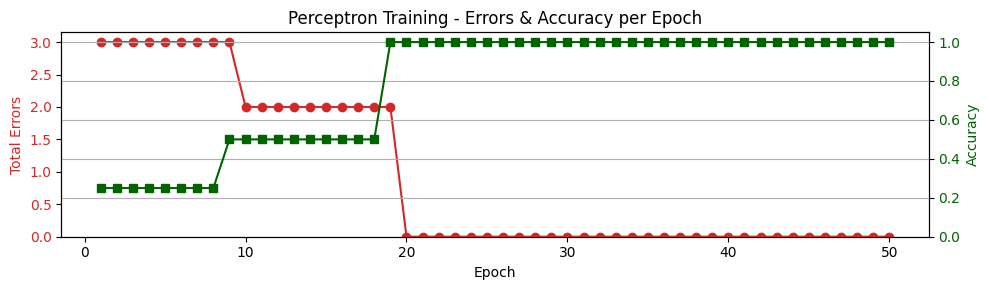

In [ ]:
# === Plot errors and accuracy ===
fig, ax1 = plt.subplots(figsize=(10, 3))

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Total Errors', color=color)
ax1.plot(range(1, epochs + 1), model.errors_per_epoch, marker='o', color=color, label='Errors')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(bottom=0)

ax2 = ax1.twinx()
color = 'darkgreen'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(range(1, epochs + 1), model.accuracy_per_epoch, marker='s', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 1.05)

plt.title("Perceptron Training - Errors & Accuracy per Epoch")
fig.tight_layout()
plt.grid(True)
plt.show()

### **Pre-Build SLP**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report

# === Create a Binary Classification Dataset ===
X = np.array([
    [2, 1],
    [1, -1],
    [-1, -2],
    [-2, 1]
])
y = np.array([1, 0, 0, 1])

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Initialize Prebuilt Single Layer Perceptron ===
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

# === Train the model ===
model.fit(X_train, y_train)

# === Predict ===
y_pred = model.predict(X_test)

# === Evaluate ===
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
print("\nBatch predictions:", model.predict(X))


Batch predictions: [1 0 0 1]


### **MLP : Multi-Layer Perceptron**

In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.01, epochs = 100):
        self.input_size = input_size # no.of features in the input layer
        self.hidden_size = hidden_size # no. of neurons in the hidden layer
        self.output_size = output_size # no. of neurons in the output layer
        self.learning_rate = learning_rate # learning rate for gradient descent step
        self.epochs = epochs

        ## Input Layer to Hidden Layer ##
        # weights and bias initialization
        self.W1 = np.random.randn(self.input_size, self.hidden_size)*0.01
        self.b1 = np.zeros((1,self.hidden_size))
        ## Hidden Layer to Output Layer ##
        # Random weights from hiden layer to output layer and bias for output layer
        self.W2 = np.random.randn(self.hidden_size,self.output_size)*0.01
        self.b2 = np.zeros((1,self.output_size))
        # Loss History & accuracy history for plotting
        self.loss_history = []
        self.accuracy_history = []

    """
    Activation Function
    """
    # ReLU activation function
    def relu(self, z):
        return np.maximum(0,z)

    # Derivative of ReLU for BackPropagation
    def relu_derivative(self, z):
        return np.where(z>0, 1, 0)

    # Softmax for multiclass classification
    def softmax(self, z):
        exp_values = np.exp(z - np.max(z,axis = 1, keepdims = True)) # subtract max for numerical stability
        return exp_values/np.sum(exp_values, axis = 1, keepdims = True)

    """
    Forward Propagation
    """
    def forward(self, x):
        ## Input Layer to Hidden Layer ##
        # computes the activated value in the hidden layer using ReLU function
        self.z1 = np.dot(x, self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        ## Hidden Layer to Output Layer ##
        # computes the probabilities using softmax for multi-class classification
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = self.softmax(self.z2)

        return self.probs

    """
    Loss Computation
    """
    # cross-entropy loss for multiclass classification
    def compute_loss(self, y_true, probs):
        loss = -np.mean(np.sum(y_true*np.log(probs), axis = 1))
        return loss

    # compute accuracy
    def compute_accuracy(self, y_true, probs):
        predictions = np.argmax(probs, axis = 1)
        true_labels = np.argmax(y_true, axis = 1)
        return np.mean(predictions == true_labels)

    """
    Backward Propagation
    """
    def backward(self, x, y):
        m = x.shape[0]
        # Gradients of the loss w.r.t weights and biases of the ouput layer
        delta3 = self.probs - y
        dW2 = np.dot(self.a1.T, delta3)/m
        db2 = np.sum(delta3, axis = 0, keepdims = True)/m
        # Gradients of the loss w.r.t weights and biases of the hidden layer
        delta2 = np.dot(delta3, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = np.dot(x.T, delta2)/m
        db1 = np.sum(delta2, axis = 0, keepdims = True)/m
        # Update the parameters : weights and biases across the layers
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    """
    Training
    """
    def fit(self, x, y):
        for epoch in range(1, self.epochs+1):
            # Forward Pass
            probs = self.forward(x)
            # Compute the categorical cross-entropy loss
            loss = self.compute_loss(y, probs)
            accuracy = self.compute_accuracy(y,probs)
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)
            # Backward pass
            self.backward(x, y)
            # Print the progress after every 10 epochs
            if epoch % 100 == 0:
                print(f'Epoch : {epoch}, Loss : {loss:.4f}, Accuracy : {accuracy:.4f}')

    """
    Testing
    """
    def test(self, x_test, y_test):
        probs = self.forward(x_test)
        loss = self.compute_loss(y_test, probs)
        accuracy = self.compute_accuracy(y_test, probs)
        print(f'Test Loss : {loss:.4f}, Test Accuracy : {accuracy:.4f}')
        return loss, accuracy

    """
    Predict class labels for new data
    """
    def predict(self, x):
        probs = self.forward(x)
        return np.argmax(probs, axis=1)  # return class label (not one-hot)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# === Generate Toy Dataset ===
X, y = make_classification(n_samples=3000, n_features=4, n_informative=4, n_redundant=0,
                           n_classes=4, n_clusters_per_class=1, random_state=42)

# === One-hot encode the labels ===
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# === Initialize and Train the Model ===
input_size = X_train.shape[1]      # 4 features
hidden_size = 8                    # you can experiment with this
output_size = y_encoded.shape[1]   # 3 classes

model = NeuralNetwork(input_size, hidden_size, output_size, learning_rate=0.1, epochs=1000)
model.fit(X_train, y_train)

# === Evaluate on Test Set ===
model.test(X_test, y_test)

Epoch : 100, Loss : 1.1323, Accuracy : 0.6038
Epoch : 200, Loss : 0.7177, Accuracy : 0.7704
Epoch : 300, Loss : 0.6222, Accuracy : 0.7896
Epoch : 400, Loss : 0.5893, Accuracy : 0.7937
Epoch : 500, Loss : 0.5683, Accuracy : 0.7979
Epoch : 600, Loss : 0.5436, Accuracy : 0.8071
Epoch : 700, Loss : 0.5180, Accuracy : 0.8229
Epoch : 800, Loss : 0.4940, Accuracy : 0.8296
Epoch : 900, Loss : 0.4719, Accuracy : 0.8383
Epoch : 1000, Loss : 0.4531, Accuracy : 0.8454
Test Loss : 0.4532, Test Accuracy : 0.8333


(np.float64(0.4531918311260002), np.float64(0.8333333333333334))

In [ ]:
# === Predict class for test set ===
y_pred = model.predict(X_test)

# Decode one-hot encoded true labels
y_true = np.argmax(y_test, axis=1)

# Show first 10 predictions
print("\nSample Predictions (first 10):")
for i in range(10):
    print(f"Input: {X_test[i]} → Predicted Class: {y_pred[i]}, True Class: {y_true[i]}")


Sample Predictions (first 10):
Input: [-0.43442417 -0.46169937 -1.53878005 -1.63052875] → Predicted Class: 0, True Class: 0
Input: [-1.43870852  0.0423682   0.82782517 -0.13841016] → Predicted Class: 2, True Class: 2
Input: [-3.00657969  0.63359946  0.97453006 -1.45922101] → Predicted Class: 2, True Class: 2
Input: [-1.4563583   0.01398232  1.2157411  -0.79642515] → Predicted Class: 2, True Class: 1
Input: [-0.41945467  1.77553142  1.6020883  -1.81098084] → Predicted Class: 2, True Class: 2
Input: [ 0.40964723  0.19507577 -2.12551391 -2.69202602] → Predicted Class: 0, True Class: 0
Input: [ 1.4333383 -1.7495421 -2.6719898  2.8024106] → Predicted Class: 3, True Class: 3
Input: [-0.83442847 -0.20696719  0.33289537  0.51049123] → Predicted Class: 2, True Class: 2
Input: [-1.75642045  0.89700188  1.81224623 -1.49729893] → Predicted Class: 2, True Class: 2
Input: [-1.91529026  1.54990413  1.20641807 -2.05989548] → Predicted Class: 2, True Class: 2


In [ ]:
# === Predict on a custom input sample ===
new_sample = np.array([[0.5, -1.2, 0.3, 2.1]])
predicted_class = model.predict(new_sample)[0]
print("\nPrediction for custom input:", new_sample)
print("Predicted Class:", predicted_class)


Prediction for custom input: [[ 0.5 -1.2  0.3  2.1]]
Predicted Class: 2


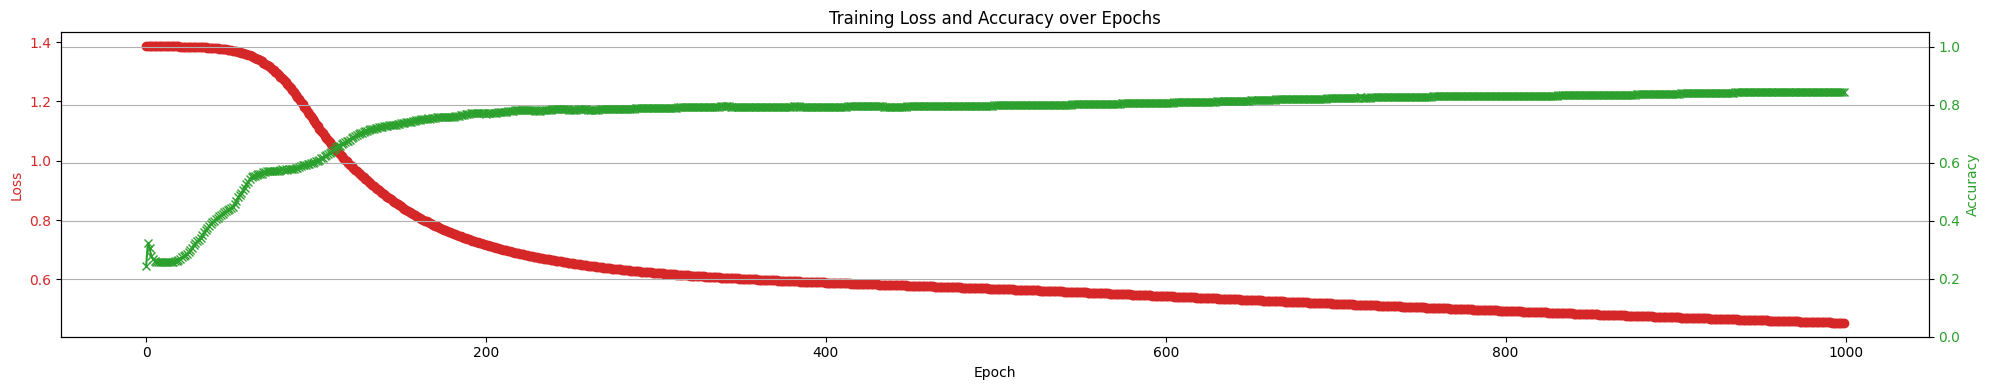

In [ ]:
import matplotlib.pyplot as plt

def plot_training_curves(model):
    epochs_range = range(len(model.loss_history))

    fig, ax1 = plt.subplots(figsize=(20, 4))

    color = 'tab:red'
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss', color=color)
    ax1.plot(epochs_range, model.loss_history, color=color, marker='o', label='Loss')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:green'
    ax2.set_ylabel('Accuracy', color=color)
    ax2.plot(epochs_range, model.accuracy_history, color=color, marker='x', label='Accuracy')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.set_ylim(0, 1.05)

    plt.title('Training Loss and Accuracy over Epochs')
    fig.tight_layout()
    plt.grid(True)
    plt.show()

# Call the plot
plot_training_curves(model)

### **Pre-Build MLP**

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# === Generate Toy Dataset ===
X, y = make_classification(n_samples=3000, n_features=4, n_informative=4, n_redundant=0,
                           n_classes=4, n_clusters_per_class=1, random_state=42)

# === One-hot encode the labels ===
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# === Train-test split ===
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Prebuilt MLP model ===
model = MLPClassifier(hidden_layer_sizes=(10, 8),   # 2 hidden layers: 10 & 8 neurons
                      activation='relu',            # ReLU activation
                      solver='adam',                # Adam optimizer
                      max_iter=2000,                # Number of training epochs
                      random_state=42)

# === Train the model ===
model.fit(X_train_scaled, y_train)

# === Predict ===
y_pred = model.predict(X_test_scaled)

# === Evaluate ===
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.9316666666666666
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       136
           1       0.97      0.90      0.93       153
           2       0.96      0.99      0.98       154
           3       0.96      0.92      0.94       157

   micro avg       0.95      0.95      0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600
 samples avg       0.94      0.95      0.94       600



### **Tensor Flow - Keras : simple model implementation**

In [ ]:
import tensorflow as tf
print("TF version : ", tf.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "not available")
print("GPU name : ", tf.test.gpu_device_name())
print("Eager execution : ", tf.executing_eagerly())

TF version :  2.18.0
GPU is available
GPU name :  /device:GPU:0
Eager execution :  True


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#data
data = tf.keras.datasets.mnist
# train test split
(x_train,y_train),(x_test,y_test) = data.load_data()
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)
# Normalization
print(f"Before normalization : x_train min : {x_train.min()}, max : {x_train.max()}")
x_train = x_train/255.0
x_test = x_test/255.0
print(f"After normalization : x_train min : {x_train.min()}, max : {x_train.max()}")
print(f"input shape : {x_train.shape[1:]}")

# Model Building
model = tf.keras.models.Sequential() # model object : linear stack of layers
# input layer
model.add(tf.keras.layers.Flatten(input_shape = x_train.shape[1:]))
# hidden layer 1
model.add(tf.keras.layers.Dense(units = 128, activation = tf.keras.activations.relu))
# hidden layer 2
model.add(tf.keras.layers.Dense(128, tf.keras.activations.relu))
# Output layer
model.add(tf.keras.layers.Dense(10, tf.keras.activations.softmax))
# model summary
model.summary()

# Compiling the model
adam_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = adam_optimizer, loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ["accuracy"])

# Train model
training_log = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

x_train shape :  (60000, 28, 28)
y_train shape :  (60000,)
x_test shape :  (10000, 28, 28)
y_test shape :  (10000,)
Before normalization : x_train min : 0, max : 255
After normalization : x_train min : 0.0, max : 1.0
input shape : (28, 28)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8788 - loss: 0.4157 - val_accuracy: 0.9664 - val_loss: 0.1099
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9696 - loss: 0.1011 - val_accuracy: 0.9716 - val_loss: 0.0902
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9795 - loss: 0.0664 - val_accuracy: 0.9743 - val_loss: 0.0843
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9850 - loss: 0.0483 - val_accuracy: 0.9758 - val_loss: 0.0838
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9877 - loss: 0.0388 - val_accuracy: 0.9769 - val_loss: 0.0803
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9903 - loss: 0.0291 - val_accuracy: 0.9753 - val_loss: 0.0832
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0231 - val_accuracy: 0.9751 - val_loss: 0.0883
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9934 - loss: 0.0204 -

### **CNN : Convolutional Neural Network**

#### **Different filters on an Image**

In [ ]:
pip install opencv-python

Width of the image: 225 px
Height of the image: 224 px
Width of the resized image: 200 px
Height of the resized image: 200 px


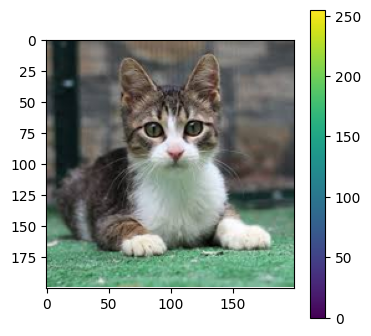

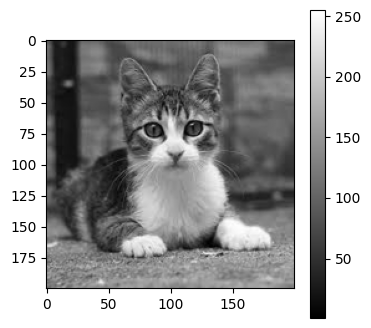

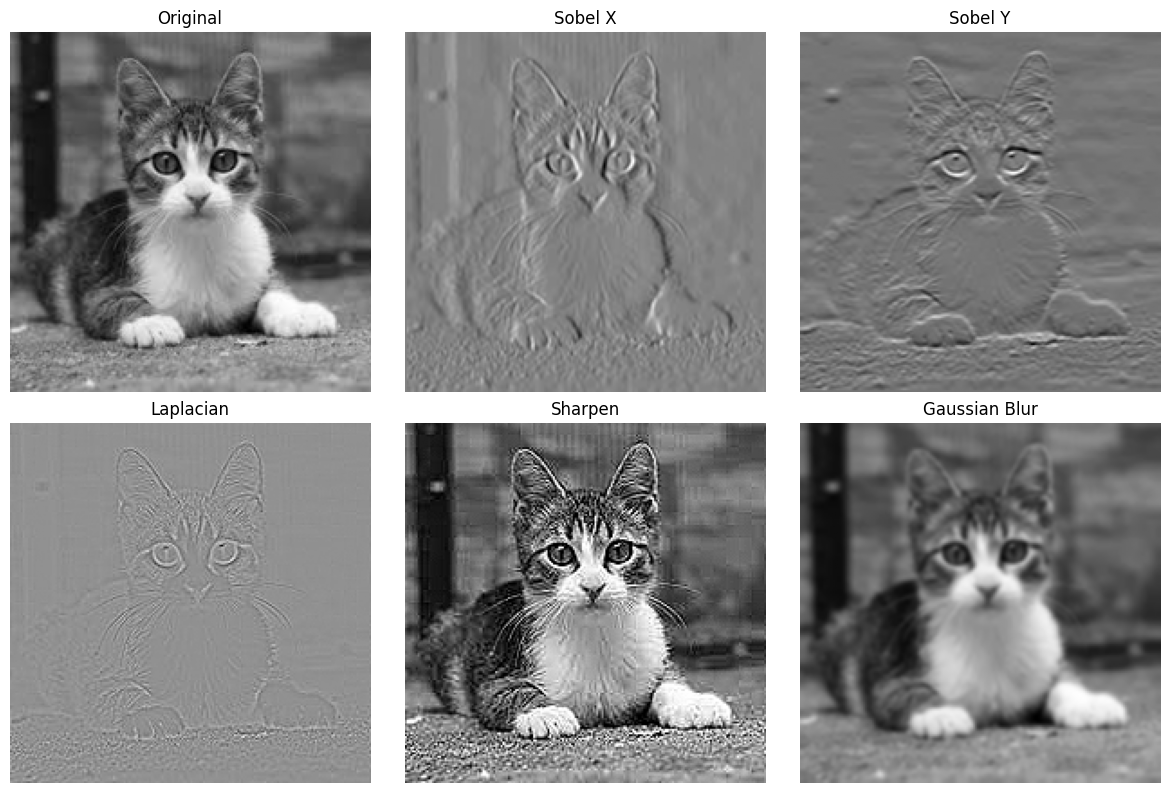

In [ ]:
from PIL import Image, ImageOps, ImageChops # pillow library for standard image processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

image_path = r"/content/cat.jpg"
img = Image.open(image_path)
### To get the size of the CAT's image
width, height = img.size
print('Width of the image:', width, 'px')
print('Height of the image:', height, 'px')
### Convert the CAT's image into 200 X 200 pixels
img_resized = img.resize((200, 200))
width1, height1 = img_resized.size
print('Width of the resized image:', width1, 'px')
print('Height of the resized image:', height1, 'px')
### Convert it into `numpy` array
cat_img_np = np.array(img_resized)

### Original cat's color image
plt.figure(figsize=(4,4))
plt.imshow(img_resized)
plt.colorbar()
plt.show()

### Grayscale cat
gray_cat = cv2.cvtColor(cat_img_np, cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(4,4))
plt.imshow(gray_cat, cmap='gray')
plt.colorbar()
plt.show()

# filters
filters = {
    'Original': gray_cat,
    'Sobel X': cv2.Sobel(gray_cat, cv2.CV_64F, 1, 0, ksize=3),
    'Sobel Y': cv2.Sobel(gray_cat, cv2.CV_64F, 0, 1, ksize=3),
    'Laplacian': cv2.Laplacian(gray_cat, cv2.CV_64F),
    'Sharpen': cv2.filter2D(gray_cat, -1, kernel= np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])),
    'Gaussian Blur': cv2.GaussianBlur(gray_cat, (5,5), 0)
}

plt.figure(figsize = (12,8))

for i, (title, img) in enumerate(filters.items(), 1):
    plt.subplot(2,3,i)
    cmap = 'gray' if len(img.shape) ==2 else None
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

#### **Pooling Operations**

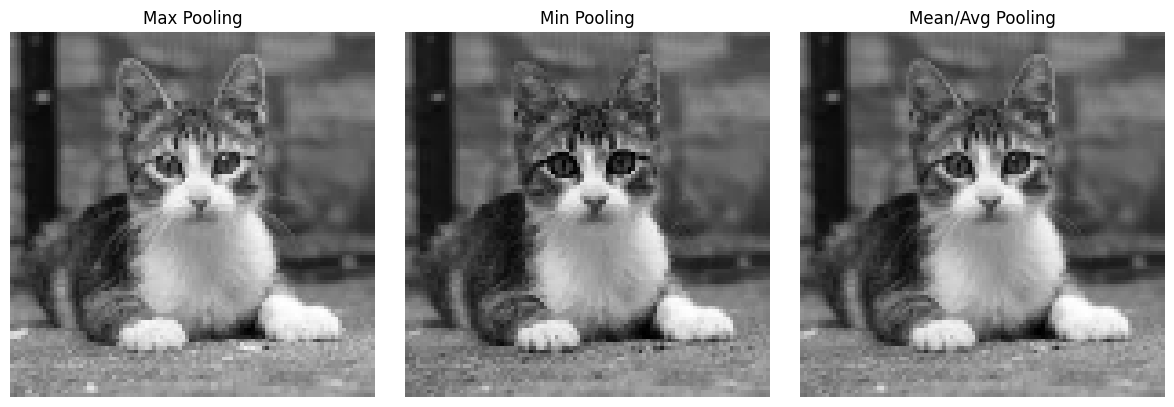

In [ ]:
import tensorflow as tf

# Convert the grayscale image to a 4D tensor for TensorFlow pooling operations
img_tensor = tf.convert_to_tensor(gray_cat, dtype=tf.float32)
img_tensor = tf.expand_dims(img_tensor, axis=0) # added batch dimension
img_tensor = tf.expand_dims(img_tensor, axis=-1) # added channel dimension

# Max pooling
max_pool = tf.nn.max_pool2d(img_tensor, ksize = (2,2), strides = 2, padding = 'VALID')
# Min pooling ( -ve max pooling)
min_pool = -tf.nn.max_pool2d(-img_tensor, ksize = (2,2), strides = 2, padding = 'VALID')
# Avg pooling
avg_pool = tf.nn.avg_pool2d(img_tensor, ksize = (2,2), strides = 2, padding = 'VALID')

# Convert tensors back to numpy arrays for visualization
max_pool_np = tf.squeeze(max_pool).numpy()
min_pool_np = tf.squeeze(min_pool).numpy()
mean_pool_np = tf.squeeze(avg_pool).numpy()

# Plot the results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(max_pool_np, cmap='gray')
plt.title('Max Pooling')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(min_pool_np, cmap='gray')
plt.title('Min Pooling')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(mean_pool_np, cmap='gray')
plt.title('Mean/Avg Pooling')
plt.axis('off')
plt.tight_layout()
plt.show()

### **CNN code**

x_train shape :  (50000, 32, 32, 3)
y_train shape :  (50000, 1)
x_test shape :  (10000, 32, 32, 3)
y_test shape :  (10000, 1)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 6, 6, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172,106 (672.29 KB)

 Trainable params: 171,914 (671.54 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.2460 - loss: 2.0635 - val_accuracy: 0.4338 - val_loss: 1.5920
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3937 - loss: 1.6670 - val_accuracy: 0.4913 - val_loss: 1.4636
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4400 - loss: 1.5483 - val_accuracy: 0.5612 - val_loss: 1.3247
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4861 - loss: 1.4573 - val_accuracy: 0.6019 - val_loss: 1.1914
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5100 - loss: 1.3806 - val_accuracy: 0.5515 - val_loss: 1.3016
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.5314 - loss: 1.3279 - val_accuracy: 0.6222 - val_loss: 1.1166
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5492 - loss: 1.2948 - val_accuracy: 0.6572 - val_loss: 1.0535
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5583 - loss: 1.2763

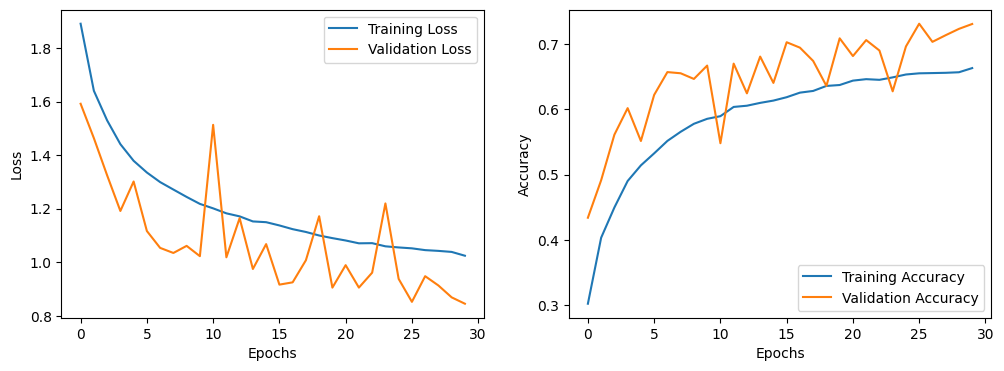

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# data
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
print("x_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("x_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)

# Model building
model = models.Sequential() # tf.keras.models.Sequential()
# Convolutional input layer
model.add(layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (x_train[0].shape)))
# Batch normalisation
model.add(layers.BatchNormalization())
# Max Pooling layer
model.add(layers.MaxPooling2D(pool_size = (2,2)))
# Dropout layer
model.add(layers.Dropout(0.25))
# Convolutional layer with regularisation
model.add(layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)))
# Batch normalisation
model.add(layers.BatchNormalization())
# Max Pooling layer
model.add(layers.MaxPooling2D(pool_size = (2,2)))
# Dropout layer
model.add(layers.Dropout(0.25))
# convolutional layer
model.add(layers.Conv2D(filters = 64, kernel_size = (1,1), activation = 'relu'))
# ANN
model.add(layers.Flatten())
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units = 10, activation = 'softmax'))
# model summary
model.summary()

# compile model
model.compile(optimizer = 'adam', loss = tf.keras.losses.sparse_categorical_crossentropy, metrics = ['accuracy'])

# train model
training_log = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test))

# training vs validation loss and accuracy plot
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(training_log.history['loss'], label = 'Training Loss')
plt.plot(training_log.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(training_log.history['accuracy'], label = 'Training Accuracy')
plt.plot(training_log.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### **RNN : Recurrent Neural Network**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Amazon fine food reviews data set
After cleaning total data records are : 568454
Rating Distribution
-------------------
Negative (1-2 star): 82,037
Positive (4-5 star): 443,777
Negative : 15.601904856089796
Positive : 84.3980951439102
Dataset is imbalanced! : skewed postive reviews
Original Imbalance
Negative : 82037 (15.601904856089796)
Positive : 443777 (84.3980951439102)
After balance
Total Samples : 164074
Negative : 82037 (50.0)
Positive : 82037 (50.0)
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6328 - loss: 0.6277 - val_accuracy: 0.6741 - val_loss: 0.5839
Epoch 2/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6765 - loss: 0.5825 - val_accuracy: 0.6822 - val_loss: 0.5806
Epoch 3/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6808 - loss: 0.5764 - val_accuracy: 0.6822 - val_loss: 0.5795
Epoch 4/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6868 - loss: 0.5717 - val_accuracy: 0.6853 - val_loss: 0.5765
Epoch 5/5
821/821 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6909 - loss: 0.5693 - val_accuracy: 0.6824 - val_loss: 0.5779


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 2, 128)         │       128,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 427,397 (1.63 MB)

 Trainable params: 142,465 (556.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 284,932 (1.09 MB)

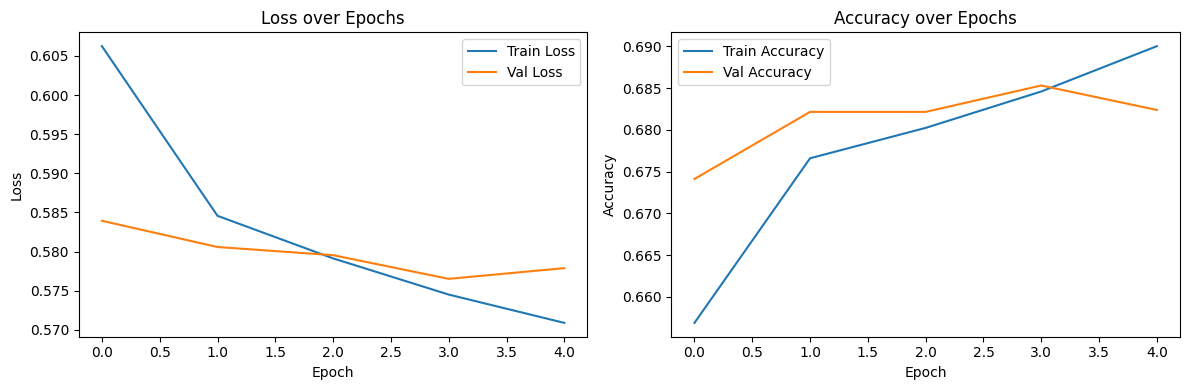

Epoch 1/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6395 - loss: 0.6286 - val_accuracy: 0.6721 - val_loss: 0.5863
Epoch 2/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6761 - loss: 0.5851 - val_accuracy: 0.6793 - val_loss: 0.5824
Epoch 3/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6808 - loss: 0.5794 - val_accuracy: 0.6829 - val_loss: 0.5793
Epoch 4/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6859 - loss: 0.5716 - val_accuracy: 0.6862 - val_loss: 0.5774
Epoch 5/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6938 - loss: 0.5657 - val_accuracy: 0.6878 - val_loss: 0.5781
Epoch 6/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6921 - loss: 0.5651 - val_accuracy: 0.6870 - val_loss: 0.5775
Epoch 7/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6976 - loss: 0.5591 - val_accuracy: 0.6899 - val_loss: 0.5780
Epoch 8/10
821/821 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6975 - loss: 0.5591 - val_accuracy: 0

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, 2, 128)         │       128,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 538,565 (2.05 MB)

 Trainable params: 179,521 (701.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 359,044 (1.37 MB)

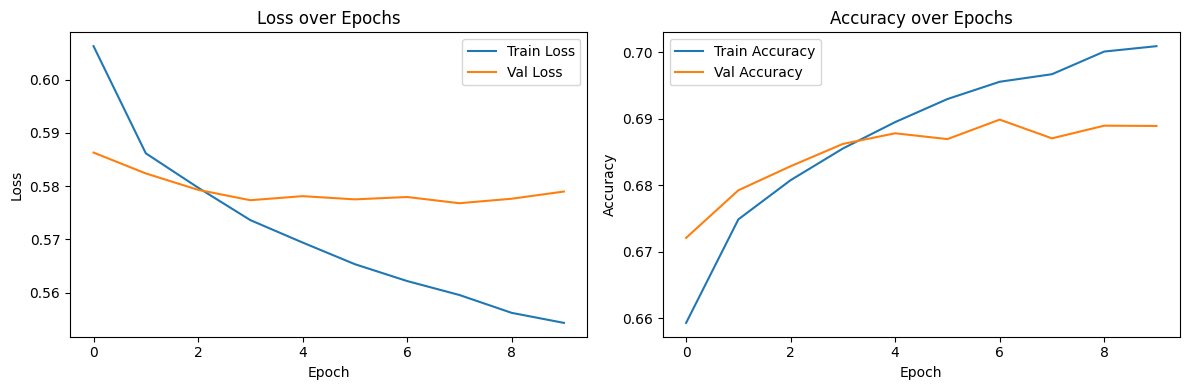

Predictions:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Positive (0.93)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Negative (0.00)


In [14]:
# !pip install tensorflow numpy scikit-learn
# !pip install nltk beautifulsoup4

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
import string
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Data
import kagglehub
print(f"Amazon fine food reviews data set")
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
csv_file = os.path.join(path, "Reviews.csv")
df = pd.read_csv(csv_file)

df_clean = df[['Text',"Score"]].dropna()
print(f"After cleaning total data records are : {len(df_clean)}")

print("Rating Distribution")
print("-------------------")
score_counts = df_clean['Score'].value_counts()
score_counts

df_binary = df_clean[df_clean['Score']!= 3].copy() #aprt from 3 all 1,2,4,5
df_binary['Score'].value_counts()
df_binary['sentiment'] = (df_binary['Score']>=4).astype(int) # 4,5 = 1, 1,2 = 0
df_binary['sentiment'].value_counts()

print(f"Negative (1-2 star): {sum(df_binary['sentiment'] == 0):,}")
print(f"Positive (4-5 star): {sum(df_binary['sentiment'] == 1):,}")
#check imbalnce - percentage
negative_pct = (sum(df_binary['sentiment'] == 0) / len(df_binary)) * 100
positive_pct = (sum(df_binary['sentiment'] == 1) / len(df_binary)) * 100
print(f"Negative : {negative_pct}")
print(f"Positive : {positive_pct}")

if positive_pct > 70:
  print(f"Dataset is imbalanced! : skewed postive reviews")

# Balancing
negative_reviews = df_binary[df_binary['sentiment'] == 0]
positive_reviews = df_binary[df_binary['sentiment'] == 1]

print(f"Original Imbalance")
print(f"Negative : {len(negative_reviews)} ({(len(negative_reviews)/len(df_binary))*100})")
print(f"Positive : {len(positive_reviews)} ({(len(positive_reviews)/len(df_binary))*100})")

# [undersample majority class] so that it matches minority class
n_minority = len(negative_reviews)

positive_downsampled = resample(positive_reviews,
                                replace=False,  # sample without replacement
                                n_samples=n_minority, # minority
                                random_state=21)

# df_balanced
df_balanced = pd.concat([negative_reviews,positive_downsampled])

# shuffle
df_balanced = df_balanced.sample(frac=1, random_state=21).reset_index(drop=True)

print(f"After balance")
print(f"Total Samples : {len(df_balanced)}")
print(f"Negative : {sum(df_balanced['sentiment'] == 0)} ({(sum(df_balanced['sentiment']==0)/len(df_balanced))*100})")
print(f"Positive : {sum(df_balanced['sentiment'] == 1)} ({(sum(df_balanced['sentiment']==1)/len(df_balanced))*100})")
# Define global resources
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Optional: contraction map (can be expanded further)
contractions = {
    "can't": "cannot", "won't": "will not", "n't": " not",
    "'re": " are", "'s": " is", "'d": " would", "'ll": " will",
    "'t": " not", "'ve": " have", "'m": " am"
}

def expand_contractions(text):
    for contraction, expanded in contractions.items():
        text = re.sub(contraction, expanded, text)
    return text

def clean_text(text, remove_stopwords=True, lemmatize=True):
    text = BeautifulSoup(text, "html.parser").get_text() # Remove HTML
    text = text.lower()  # Lowercase
    text = expand_contractions(text) # Expand contractions
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation and special characters
    text = re.sub(r"\d+", "", text) # Remove digits
    tokens = word_tokenize(text)  # Tokenize
    if remove_stopwords: # Remove stopwords
        tokens = [word for word in tokens if word not in stop_words]
    if lemmatize: # Lemmatize
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = " ".join(tokens) # Join back into string
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip() # Remove extra whitespace
    return cleaned_text

# Clean the texts
df_balanced['clean_text'] = df_balanced['Text'].apply(clean_text)

# Tokenization and Padding
X = df_balanced['clean_text'].values # features
y = df_balanced['sentiment'].values # lables 0 -1
MAX_FEATURES = 1000 # VOCAB
tokenizer = Tokenizer(num_words=MAX_FEATURES, oov_token='<OOV>')
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
# MAX_LEN = 100
maxlen = max(len(seq) for seq in sequences)
X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding='post', truncating="post")

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
   X_padded, y,
   test_size=0.20,
   random_state=42, #where 0-2^32-1
   stratify=y #maintain class balance overall by stratifieng the sample
)
# RNN Model
def create_rnn_model():
  model = Sequential([
      #word ind to dense vector
      Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=maxlen),
      SimpleRNN(units=64, return_sequences=False),
      Dropout(0.5),
      Dense(32, activation="relu"),
      Dense(1, activation='sigmoid')
  ])
  return model

model  = create_rnn_model()
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=5,
    validation_split=0.20,
    verbose=1
)
model.summary()

def plot_history(history):
    plt.figure(figsize=(12,4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

# LSTM Model
def create_lstm_model():
  model = Sequential([
      #word ind to dense vector
      Embedding(input_dim=MAX_FEATURES, output_dim=128, input_length=maxlen),

      LSTM(units=64, return_sequences=False),
      Dropout(0.5),
      Dense(32, activation="relu"),
      Dense(1, activation='sigmoid')
  ])
  return model

model  = create_lstm_model()
model.compile(
    optimizer='adam',
    loss="binary_crossentropy",
    metrics=['accuracy']
)
history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.20,
    verbose=1
)
model.summary()

plot_history(history)

def predict_sentiment(text):
    cleaned = clean_text(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=10)
    pred = model.predict(padded)[0][0]
    return f"Positive ({pred:.2f})" if pred > 0.5 else f"Negative ({pred:.2f})"

# Example
print("===============================================")
print("Predictions:")
print(predict_sentiment("Absolutely amazing movie!"))
print(predict_sentiment("I hate this. Worst ever."))
